In [20]:
import os
import glob
import numpy as np
import pandas as pd
import geopandas as gpd

import cartopy.feature as cf
import cartopy.crs as ccrs

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [21]:
year = 2024

In [22]:
dir_base = os.path.join('/','media','arturo','Arturo','Data','Brazil')

In [23]:
SP = gpd.read_file(os.path.join('..','..','geometry','SaoPaulo.geojson')) 

In [24]:
stations_list = glob.glob(f'/media/arturo/Arturo/Data/Brazil/INEMET/raw/{year}/*.CSV')
stations_list = sorted(stations_list)
stations_len = len(stations_list)   
print(f'Number of stations: {stations_len}')

Number of stations: 565


In [25]:
FILE = []
UF = []
LAT = []
LON = []
for nn in range(stations_len):
    with open(stations_list[nn], "r", encoding="latin1") as arquivo:
        primeiras_linhas = [arquivo.readline().strip() for _ in range(8)]
        uf_ = primeiras_linhas[1].split(';')[-1]
        la = (primeiras_linhas[4].split(';')[-1])
        lo = (primeiras_linhas[5].split(';')[-1])

        FILE.append(stations_list[nn].split('/')[-1])
        UF.append(uf_)
        LAT.append(float(la.replace(',', '.')))
        LON.append(float(lo.replace(',', '.')))

METADATA = pd.DataFrame({'FILE': FILE, 'UF': UF, 'LAT': LAT, 'LON': LON})
METADATA = METADATA[METADATA['LAT']!=0.900000]
METADATA.reset_index(drop=True, inplace=True)

In [30]:
name_out = os.path.join('/media/arturo/Arturo/Data/Brazil/INEMET',f'METADATA_{year}.csv')
METADATA.to_csv(name_out, index=False, header=True)

In [27]:
SP_lon_min, SP_lat_min, SP_lon_max, SP_lat_max = -53.11, -25.31, -44.16, -19.77

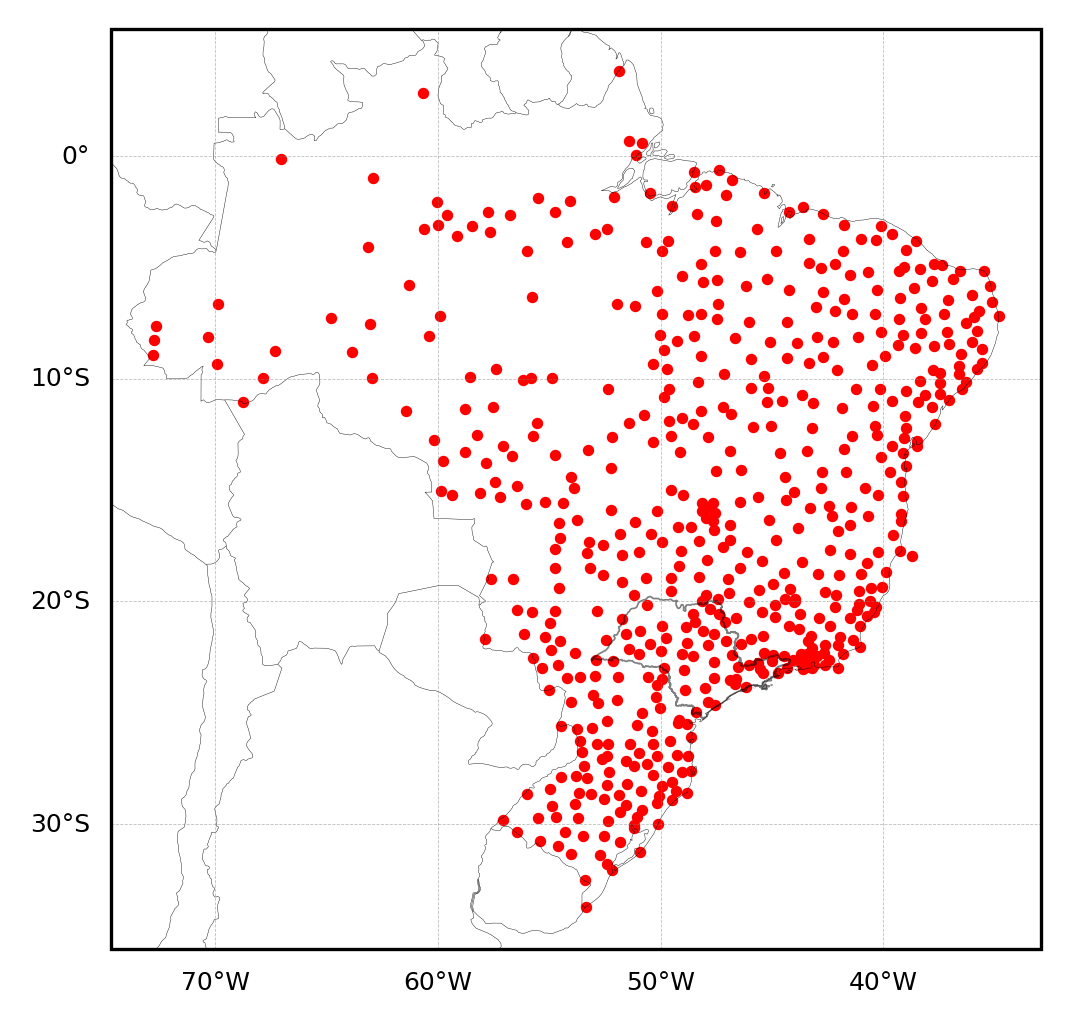

In [28]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

#==================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
# ax1.set_extent([SP_lon_min, SP_lon_max, SP_lat_min, SP_lat_max],crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')

ax1.add_geometries(SP.geometry, ccrs.PlateCarree(), edgecolor='k', facecolor='None', linewidth=0.4, alpha=0.5)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

ax1.scatter(METADATA['LON'],METADATA['LAT'],s=3,marker='o',color='r',transform=proj)

In [32]:
for station_id in range(len(METADATA)):#
    STATION = pd.read_csv(os.path.join(dir_base,'INEMET','raw',str(year),METADATA['FILE'].values[station_id]),skiprows=8, encoding='latin1',sep=';')

    datetime = []
    for pos in range(len(STATION)):
        datetime.append(pd.to_datetime(STATION['Data'].values[pos]+' '+STATION['Hora UTC'].values[pos]))

    PRE_char = STATION['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].values.astype(str)
    PRE_char = np.char.replace(PRE_char, ',', '.')
    PRE_float = PRE_char.astype(float)

    STATION_UPDATE = pd.DataFrame({'datetime':pd.to_datetime(datetime),'PRE(mm)':PRE_float})
    STATION_UPDATE['PRE(mm)'] = STATION_UPDATE['PRE(mm)'].replace(-9999, np.nan)
    STATION_UPDATE.set_index('datetime', inplace=True)

    STATION_SUM = STATION_UPDATE['PRE(mm)'].resample('1h').sum()
    STATION_1H = pd.DataFrame({'datetime':STATION_SUM.index, 'PRE':STATION_SUM.values})

    TIME_REF = pd.date_range(start=f'{year}-01-01 00:00', end=f'{year}-12-31 23:00', freq='1h')
    TIME_PD = pd.DataFrame({'TIME':TIME_REF})

    if len(STATION_1H) < len(TIME_REF):
        print('WARNING: RAINGAUGE time is not complete. fill times with NaN')
        OBS_TMP = pd.merge(STATION_1H, TIME_PD, on='TIME', how='right')
    elif len(STATION_1H) == len(TIME_REF):
        print('GOOD: RAINGAUGE has certain times!!')
    else:
        print('ERROR: RAINGAUGE has too much times, verify!!')

    name_out = os.path.join(dir_base,'INEMET','1h',str(year),METADATA['FILE'].values[station_id])
    STATION_1H.to_csv(name_out, index=False, header=True)

GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain times!!
GOOD: RAINGAUGE has certain 